In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings
warnings.filterwarnings("ignore")


In [2]:
csv_file = "datasets/Ecommerce_Customers_01.csv"
df = pd.read_csv(csv_file)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# Standardising
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']])

In [6]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [7]:
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
principal_df['Yearly Amount Spent'] = df['Yearly Amount Spent']

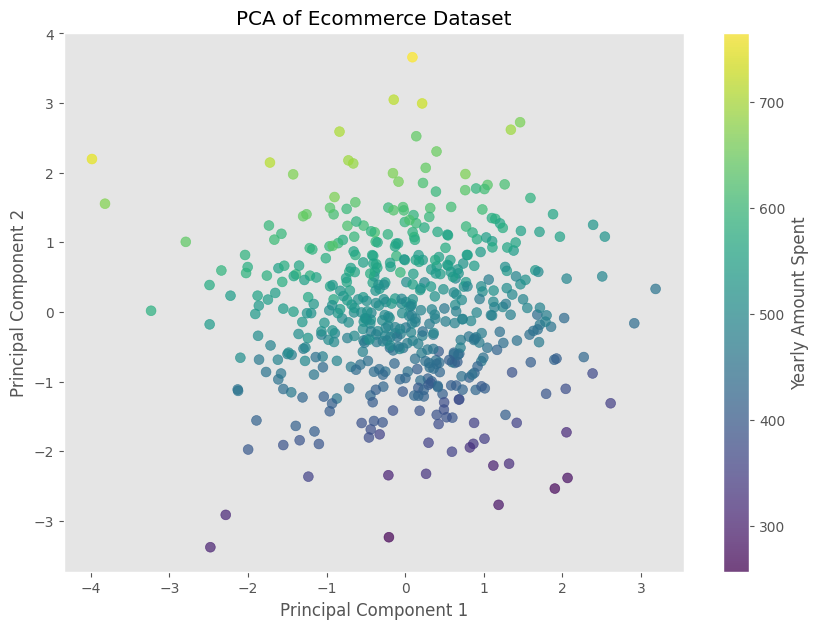

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], 
            c=principal_df['Yearly Amount Spent'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Yearly Amount Spent')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Ecommerce Dataset')
plt.grid()
plt.show()

In [9]:
# Create a DataFrame for better readability
pca_df = pd.DataFrame(data=pca.components_, columns=['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'])
pca_df


[[-0.49489498  0.45746753  0.62572685 -0.39277007]
 [ 0.33593826  0.6366727   0.21458147  0.66011222]]
   Avg. Session Length  Time on App  Time on Website  Length of Membership
0            -0.494895     0.457468         0.625727             -0.392770
1             0.335938     0.636673         0.214581              0.660112
